In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [146]:
file_name = 'usa-real-estate-dataset/realtor-data.zip.csv'
data = pd.read_csv('realtor-data.zip.csv')

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [148]:
for feature in data.columns:
    print(feature, data[feature].isna().value_counts("True"))

brokered_by brokered_by
False    0.997964
True     0.002036
Name: proportion, dtype: float64
status status
False    1.0
Name: proportion, dtype: float64
price price
False    0.999308
True     0.000692
Name: proportion, dtype: float64
bed bed
False    0.783812
True     0.216188
Name: proportion, dtype: float64
bath bath
False    0.770133
True     0.229867
Name: proportion, dtype: float64
acre_lot acre_lot
False    0.853759
True     0.146241
Name: proportion, dtype: float64
street street
False    0.995119
True     0.004881
Name: proportion, dtype: float64
city city
False    0.999368
True     0.000632
Name: proportion, dtype: float64
state state
False    0.999996
True     0.000004
Name: proportion, dtype: float64
zip_code zip_code
False    0.999866
True     0.000134
Name: proportion, dtype: float64
house_size house_size
False    0.74466
True     0.25534
Name: proportion, dtype: float64
prev_sold_date prev_sold_date
False    0.670184
True     0.329816
Name: proportion, dtype: float64


There is a lot of missing value for house_size, prev_sold_date, bed, bath, acre_lot. We will consider imputing strategy for these features.

The other features have very small proportion of missing values. We can consider dropping strategy for these features. 

In [149]:
data.dropna(subset=["brokered_by", "price", "street", "city", "state", "zip_code"], inplace=True)

In [150]:
data.shape

(2207981, 12)

In [151]:
for feature in data.columns:
    print(feature, data[feature].nunique())

brokered_by 109654
status 3
price 101530
bed 99
bath 86
acre_lot 15841
street 1995163
city 19675
state 55
zip_code 30251
house_size 12018
prev_sold_date 14937


Since there is so many unique values for bed and bath. We suspect that there must be some issues with it (mistyped, wrong format)

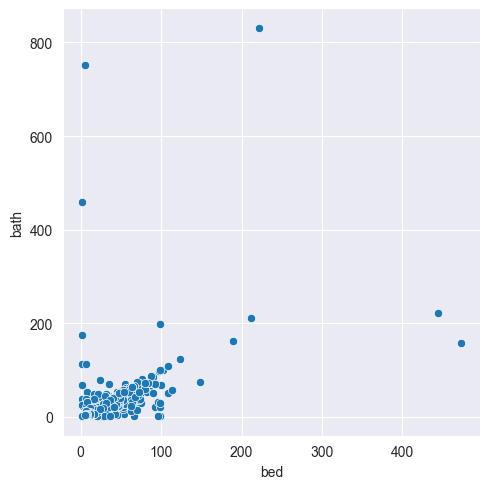

In [152]:
sns.relplot(
    data,
    x="bed",
    y="bath",
    # title="# of bed and # of bath correlation"
)

# Replace with px.scatter before submit

Based on the graph, we can see that there are a lot of unrealistic values for both beds and baths. There are even house with 1 bed and 460 bathrooms. Moreover, this dataset is collected from a real estate website. We can safely say that office and buildings may not be included in this dataset. Hence, we assume that a house generally, only has maximum of 9 beds and 9 baths.

Strategy: Format values for bed and bath to only take the first digit of the value (e.g: 333 baths = 3 baths). Exclude 0 values for both baths and beds. Moreover, a house can have more bathrooms than bedrooms. However, we assume the relationship that the difference between bed no. and bath no. must be <= (bed no. / 2).

In [153]:
# Cleaning bed and bath mistype.
def clean_bed_and_bath(x):
    while x >= 10:
        x = x // 10
    return x

data["bed"] = data["bed"].apply(clean_bed_and_bath)
data["bath"] = data["bath"].apply(clean_bed_and_bath)
ideal_data = data[(np.abs(data["bed"] - data["bath"]) <= (data["bed"] / 2))]

In [161]:
ideal_data["bed"].isna().value_counts("True") 

bed
False    1.0
Name: proportion, dtype: float64

This is the dataset that fits our assumptions perfectly. However, it excluded all the nan values of beds and baths. We will use this dataset to train linear regression model to impute bed and bath for the original dataset.